# Iris Dataset Notebook


## What is the Iris Dataset?
The iris dataset is

---
## Information about the dataset
* 150 iris flowers of 3 species were identified and used for this dataset
    * setosa
    * virginica
    * versicolor
* There are 4 columns included of the flowers' measurements
    * sepal length
    * sepal width
    * petals length
    * petals width
* The 5th column in the dataset is the flower species - named as class in this case

**50 flowers of each species were used for this dataset**

---
## To train and test the Iris dataset we need to do the following:

* Get the inputs/features
    - **Features:**
        1. sepal length in cm
        2. sepal width in cm
        3. petal length in cm
        4. petal width in cm
* Get the desired output/targets
    - **Targets:**
        1. Iris Setosa
        2. Iris Versicolour
        3. Iris Virginica
* Split the dataset into 'training' & 'testing'
* Train the model using the 'fit' method on the 'training'data.
* Predict the outputs for the 'test data'
* Print & plot the outputs

This information was found [here](https://mclguide.readthedocs.io/en/latest/sklearn/multiclass.html#iris-dataset)

## Import all the packages required for the dataset

In [1]:
# Load data sets - data procesing
import pandas as pd

# Encoding categorical variables.
import sklearn.preprocessing as pre

# Splitting into training and test sets.
import sklearn.model_selection as mod

# 
import sklearn.neighbors as nei

from sklearn.metrics import accuracy_score

# See the relation between each pair of features
import seaborn as sns

# Linear algebra
import numpy as np

import random

# Visualise data
import matplotlib.pyplot as plt
%matplotlib inline

## Show the dataset

### Read the iris dataset
**Take the dataset from a csv (excel) file and read it**

In [2]:
# Importing/loading the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")

# Shows the dataset
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Dataset information

In [3]:
# Source code adapted from: 
# - https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342

In [4]:
# Shows head of the dataset - first 5
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Information about the dataset
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# Statistics summarizing dispersion & shape of dataset’s distribution
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Amount of rows and columns of dataset
dataset.shape

(150, 5)

In [8]:
# Object containing counts of unique values
dataset['class'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: class, dtype: int64

### Visualise

#### Display the measurements of the iris species

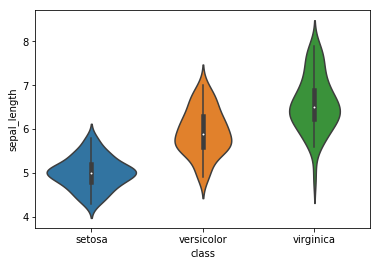

In [29]:
# Source code adapted from:
# - https://www.kaggle.com/adityabhat24/iris-data-analysis-and-machine-learning-python
sns.violinplot(data=dataset, x="class", y="sepal_length")

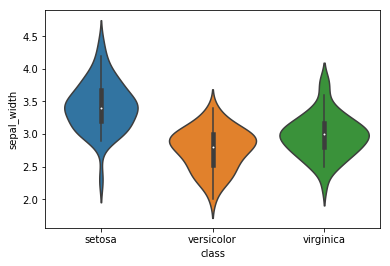

In [10]:
sns.violinplot(data=dataset, x="class", y="sepal_width")

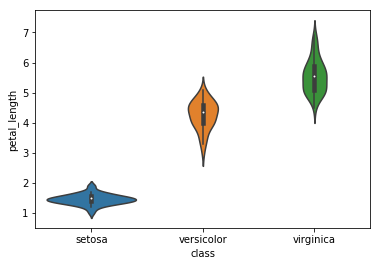

In [11]:
sns.violinplot(data=dataset, x="class", y="petal_length")

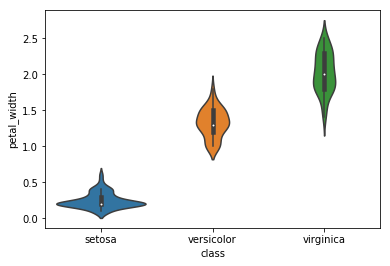

In [12]:
sns.violinplot(data=dataset, x="class", y="petal_width")

#### Plot the Iris dataset which includes the distinguished species of the iris

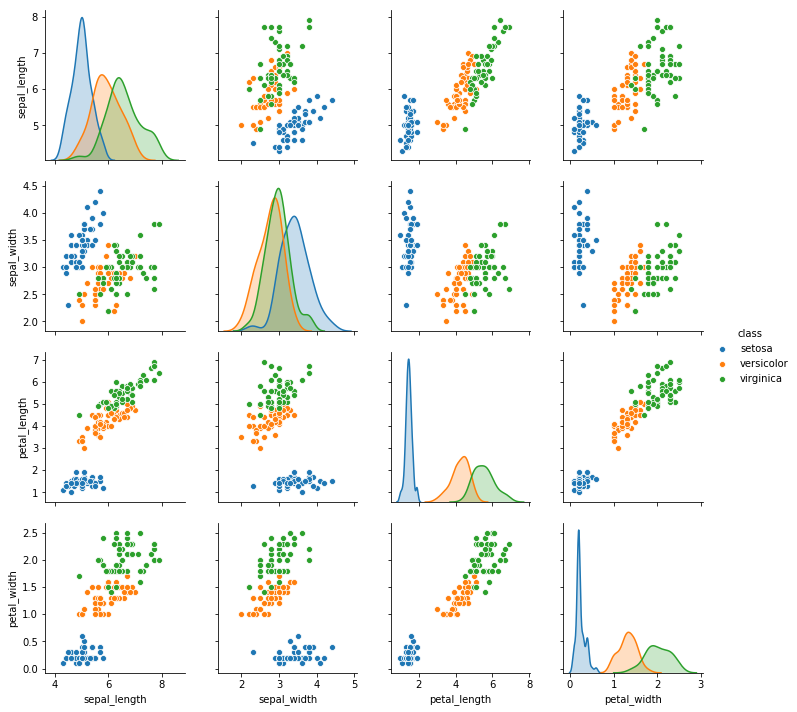

In [13]:
# Source code adapted from:
# - https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset
# Show the iris dataset using pairplot
sns.pairplot(dataset, hue='class', markers='o')

## Train the dataset

### Inputs
**Get the features of the Iris dataset which are the measurements taken of the iris flowers**

In [14]:
# Check column names to find out what names the features were given
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [15]:
# Source code adapted from: 
# - https://stackoverflow.com/questions/41130856/keyerror-petal-length-not-in-index
# dataset['sepal_length (cm)', 'sepal_width (cm)', 'petal_length (cm)', 'petal_width (cm)']
inputs = np.array(dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
inputs

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Outputs
**Get the targets of the Iris dataset which are the species of the Iris that were included in this dataset**

In [16]:
outputs = np.array(dataset['class'], dtype='<U10')
outputs

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

### Classify

In [17]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit

In [18]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Train

In [19]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

### Predict

In [20]:
# Source code adapted from:
# - https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/knn-iris.ipynb
# Predict the species from the inputs 
prediction1 = knn.predict([[5.1, 3.5, 1.4, 0.2]])
prediction2 = knn.predict([[5.9, 3. , 5.1, 1.8]])

In [21]:
# This should be setosa as it is the first input in the list of inputs
prediction1

array(['setosa'], dtype='<U10')

In [22]:
# This should be virginica as it is the last input in the list of inputs
prediction2

array(['virginica'], dtype='<U10')

In [23]:
# Source code adapted from: 
# - https://stackoverflow.com/questions/1058712/how-do-i-select-a-random-element-from-an-array-in-python
# Takes a random array of inputs from the iris' measurements
rand = random.choice(inputs)
rand

array([6.1, 3. , 4.9, 1.8])

In [24]:
prediction3 = knn.predict([rand])

In [25]:
# This should predict the species of the iris according to the random measurements chosen
prediction3

array(['virginica'], dtype='<U10')

### Accuracy

In [26]:
# Source code adapted from:
# - https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
pred = knn.predict(inputs_test)
pred

array(['virginica', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [27]:
# It shows how accurate the dataset is
accuracy_score(outputs_test, pred)

1.0